In [ ]:
import torch

In [ ]:
temp  = torch.tensor([[1,2],[3,4]])

In [ ]:
temp[0,1]

tensor(2)

In [ ]:
temp = torch.tensor([[1,2],[3,4]])
temp = temp.reshape(1,-1)
temp

tensor([[1, 2, 3, 4]])

In [ ]:
temp = torch.tensor([[1,2],[3,4]])
temp = temp.view(1,-1)
temp

tensor([[1, 2, 3, 4]])

## 순전파 학습

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch

# 간단한 데이터셋 정의
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 데이터셋 생성
data = torch.arange(10)  # 간단한 0부터 9까지의 숫자 데이터

# DataLoader 사용
dataloader = DataLoader(data, batch_size=2, shuffle=True, num_workers=2)

# 데이터 로드와 출력
for batch in dataloader:
    print(batch)


tensor([4, 1])
tensor([3, 6])
tensor([0, 7])
tensor([2, 9])
tensor([5, 8])


In [3]:
import torch.nn as nn
import torch

In [ ]:
class SimpleNN(nn.Module):
  def __init__(self,n_feature,n_hidden,n_output):
    super(SimpleNN,self).__init__()
    self.hidden1 = nn.Linear(n_feature,n_hidden)
    self.relu = nn.ReLU()
    self.hidden2 = nn.Linear(n_hidden,n_hidden)
    self.output = nn.Linear(n_hidden,n_output)
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)
    x = self.relu(x)
    y = self.output(x)
    print(y)
    z = self.softmax(y)
    print(z)
    return z

nn.Softmax(dim=~)에서 dim은 전에 나온 출력값의 차원이 (1,2,3)일 때 몇번째 인덱스로 계산할 것인지 결정한다.차례대로 인덱스 0,1,2이다.

In [ ]:
instance = SimpleNN(3,4,2)


In [ ]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],dtype=torch.float32)
#y출력
#z출력
instance.forward(x)

tensor([[-0.1706,  0.1449],
        [-0.1069,  0.1472],
        [-0.1640,  0.1290],
        [-0.2211,  0.1108]], grad_fn=<AddmmBackward0>)


tensor([[0.4218, 0.5782],
        [0.4368, 0.5632],
        [0.4273, 0.5727],
        [0.4178, 0.5822]], grad_fn=<SoftmaxBackward0>)

In [ ]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],dtype=torch.float32)
x.shape

torch.Size([4, 3])

In [ ]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32)
instance.forward(x)

tensor([[-0.1947, -0.6054],
        [-0.0442, -0.7879],
        [ 0.1043, -0.9682]], grad_fn=<AddmmBackward0>)


tensor([[0.2848, 0.3954],
        [0.3311, 0.3294],
        [0.3841, 0.2751]], grad_fn=<SoftmaxBackward0>)

## 역전파 학습

최종적인 output이 (4,2)이므로 label_data도 (4,2)로 되야한다.

In [ ]:
label_data = torch.tensor([[1,0],[1,0],[1,0],[1,0]],dtype=torch.float32)

In [ ]:
x=torch.tensor([[1,2],[1.1,2.1],[0.9,1.9],[1.2,2.2]],dtype=torch.float32)

In [ ]:
#모델 지정
model = SimpleNN(2,4,2)

#손실함수 지정
loss_fn = nn.CrossEntropyLoss()

#옵티마이저 저장
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
num_epochs = 500
for epochs in range(num_epochs):
  z = model.forward(x)
  loss = loss_fn(z,label_data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Epoch:{epochs},loss={loss}')


tensor([[ 0.6005, -0.0147],
        [ 0.6298, -0.0211],
        [ 0.5713, -0.0083],
        [ 0.6590, -0.0275]], grad_fn=<AddmmBackward0>)
tensor([[0.6491, 0.3509],
        [0.6572, 0.3428],
        [0.6410, 0.3590],
        [0.6652, 0.3348]], grad_fn=<SoftmaxBackward0>)
Epoch:0,loss=0.5517432689666748
tensor([[ 0.6153, -0.0254],
        [ 0.6450, -0.0321],
        [ 0.5856, -0.0187],
        [ 0.6734, -0.0374]], grad_fn=<AddmmBackward0>)
tensor([[0.6549, 0.3451],
        [0.6631, 0.3369],
        [0.6466, 0.3534],
        [0.6706, 0.3294]], grad_fn=<SoftmaxBackward0>)
Epoch:1,loss=0.5469350814819336
tensor([[ 0.6275, -0.0336],
        [ 0.6560, -0.0388],
        [ 0.5987, -0.0280],
        [ 0.6845, -0.0440]], grad_fn=<AddmmBackward0>)
tensor([[0.6595, 0.3405],
        [0.6670, 0.3330],
        [0.6517, 0.3483],
        [0.6745, 0.3255]], grad_fn=<SoftmaxBackward0>)
Epoch:2,loss=0.543248176574707
tensor([[ 0.6378, -0.0399],
        [ 0.6666, -0.0454],
        [ 0.6090, -0.0345],
     

## RNN 모델 실습

In [1]:
import torch
import torch.nn as nn

x = torch.randn(2, 4, 5) # sequence length = 2, batch size = 4, dimension = 5

In [2]:
x

tensor([[[-0.9516,  1.0007, -1.7891,  1.8806, -0.0207],
         [ 0.9885,  1.4549,  0.4662, -0.3036,  0.2957],
         [ 0.2830,  1.8641, -0.1049,  0.3833,  0.6084],
         [-2.7534, -0.1208, -1.2288,  0.3533,  0.1239]],

        [[ 1.1626, -0.4269, -0.0347,  1.4222,  0.2986],
         [-0.1020, -0.9750, -0.3859, -0.5829, -0.3673],
         [-0.0238, -1.4037, -1.0038,  1.7617, -1.0486],
         [-2.8062,  0.0150, -0.7475,  0.8103, -0.9214]]])

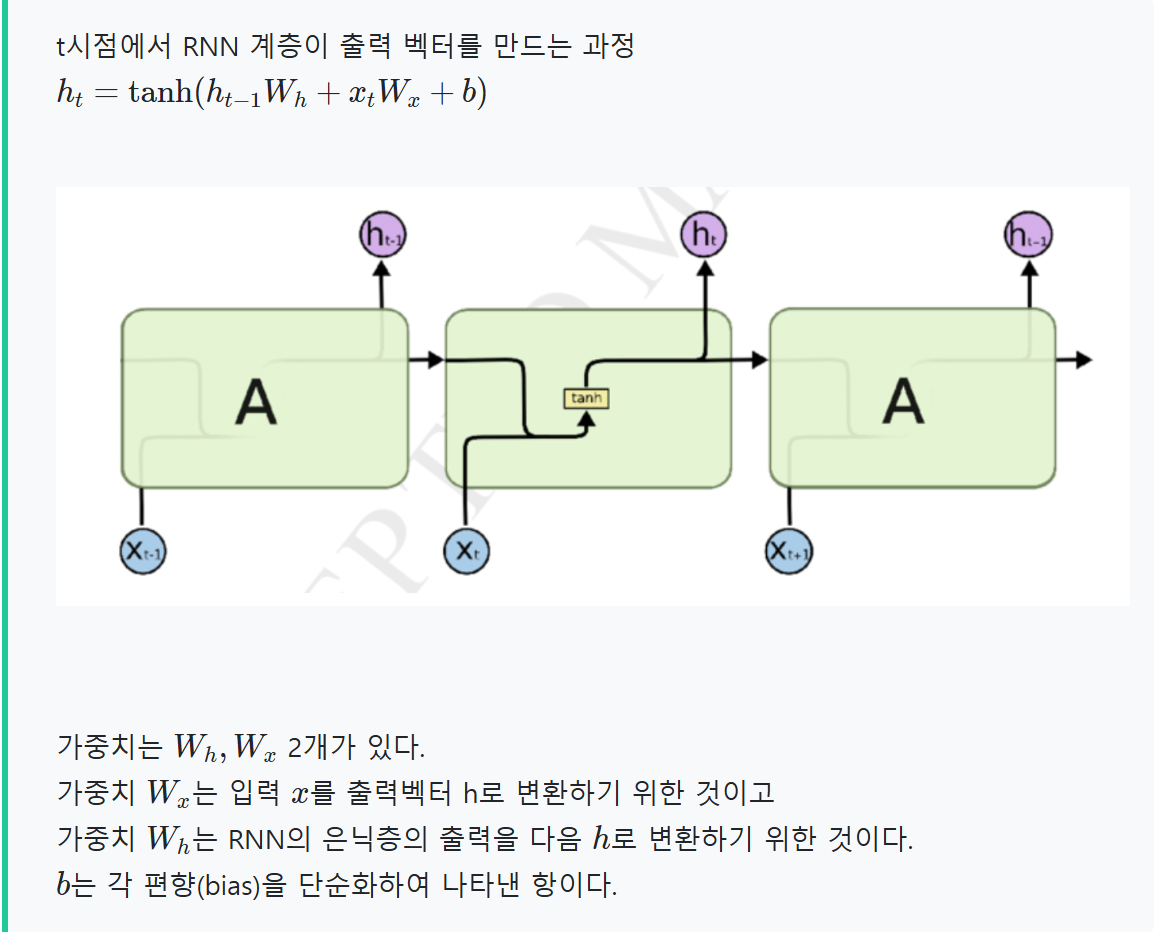

위의 그림에서 x_t 즉, 하나의 타임 스텝에 대하여 (4,5)의 벡터가 들어가게된다.

In [6]:
Net = nn.RNN(input_size = 5,hidden_size = 3,num_layers = 1)

In [7]:
output,hn = Net(x)

In [8]:
output

tensor([[[-0.7634, -0.2905,  0.2190],
         [ 0.6374,  0.6175,  0.5705],
         [ 0.3442,  0.2616,  0.5133],
         [-0.6812, -0.6335, -0.6706]],

        [[ 0.6337,  0.8399,  0.9256],
         [-0.5351,  0.6356, -0.2798],
         [-0.8343,  0.7313,  0.5456],
         [-0.3951, -0.6662, -0.4090]]], grad_fn=<StackBackward0>)

In [9]:
hn

tensor([[[ 0.6337,  0.8399,  0.9256],
         [-0.5351,  0.6356, -0.2798],
         [-0.8343,  0.7313,  0.5456],
         [-0.3951, -0.6662, -0.4090]]], grad_fn=<StackBackward0>)

In [10]:
#layer을 여러개 추가했을 때
Net = nn.RNN(input_size = 5,hidden_size = 3, num_layers = 3)

In [11]:
output,hn = Net(x)

In [14]:
output
#최종 layer 거친 벡터에 대해서만

tensor([[[ 0.4457, -0.7258, -0.6195],
         [ 0.4262, -0.7526, -0.5773],
         [ 0.4947, -0.7885, -0.6572],
         [ 0.4149, -0.7100, -0.5836]],

        [[ 0.8188, -0.9524, -0.6987],
         [ 0.7752, -0.9263, -0.5987],
         [ 0.7782, -0.9226, -0.5803],
         [ 0.6867, -0.8836, -0.4574]]], grad_fn=<StackBackward0>)

In [15]:
hn
# 각 layer에서의 마지막 hidden state값들만 출력

tensor([[[ 0.7544,  0.9625,  0.7602],
         [ 0.0428,  0.7054,  0.5626],
         [-0.6247,  0.9762,  0.6563],
         [-0.1856,  0.5918, -0.0856]],

        [[-0.8030,  0.7655,  0.7908],
         [-0.5938,  0.8167,  0.5100],
         [-0.5217,  0.9059,  0.3985],
         [-0.1219,  0.7720,  0.4046]],

        [[ 0.8188, -0.9524, -0.6987],
         [ 0.7752, -0.9263, -0.5987],
         [ 0.7782, -0.9226, -0.5803],
         [ 0.6867, -0.8836, -0.4574]]], grad_fn=<StackBackward0>)

In [16]:
#양방향 조건이 추가되는 경우
Net = nn.RNN(input_size=5, hidden_size=3, num_layers=3, bidirectional=True)

In [17]:
output,hn=Net(x)

In [18]:
output
#concatenation된 형태로 출력(정방향과 역방향 통해 출력된 값들을 합쳐서 (2,4,6)이 만들어짐)

tensor([[[-0.2990,  0.2439,  0.6523, -0.6604, -0.0664, -0.3332],
         [-0.7279,  0.1858,  0.0377,  0.0953,  0.1405,  0.0210],
         [-0.5748,  0.2122,  0.3191, -0.2881,  0.0116, -0.1019],
         [-0.0633,  0.4188,  0.7677, -0.7633, -0.0543, -0.6059]],

        [[-0.7500,  0.3815,  0.6532, -0.2835, -0.0192, -0.3353],
         [-0.1909,  0.7199,  0.3086, -0.1563,  0.3152, -0.2108],
         [-0.4198,  0.6148,  0.5234, -0.2963,  0.1691, -0.3339],
         [-0.2444,  0.6662,  0.8165, -0.7292,  0.1519, -0.4838]]],
       grad_fn=<CatBackward0>)

In [19]:
hn

tensor([[[-0.8193,  0.2646, -0.5846],
         [-0.4881,  0.3274,  0.6003],
         [-0.6573,  0.4690,  0.4183],
         [ 0.4813, -0.7776,  0.9551]],

        [[-0.5994,  0.2213, -0.2297],
         [ 0.1258,  0.1969,  0.5871],
         [-0.3751,  0.2891,  0.2108],
         [ 0.7593,  0.1630, -0.8272]],

        [[-0.7842, -0.3042, -0.4104],
         [-0.5700,  0.0342, -0.6639],
         [-0.6576, -0.2372, -0.5602],
         [-0.1734, -0.9245, -0.7141]],

        [[ 0.6069,  0.8382, -0.3654],
         [ 0.6423,  0.5874, -0.6248],
         [ 0.5790,  0.6859, -0.5186],
         [ 0.6776,  0.9698, -0.6036]],

        [[-0.7500,  0.3815,  0.6532],
         [-0.1909,  0.7199,  0.3086],
         [-0.4198,  0.6148,  0.5234],
         [-0.2444,  0.6662,  0.8165]],

        [[-0.6604, -0.0664, -0.3332],
         [ 0.0953,  0.1405,  0.0210],
         [-0.2881,  0.0116, -0.1019],
         [-0.7633, -0.0543, -0.6059]]], grad_fn=<StackBackward0>)

## https://github.com/udacity/deep-learning-v2-pytorch/blob/master/recurrent-neural-networks/time-series/Simple_RNN.ipynb에 나온 rnn코드들을 한줄한줄 해석해보자!

In [47]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # last, fully-connected layer
        self.fc = nn.Linear(48, output_size)

    def forward(self, x, hidden):
        # x (sequence length, batch_size, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(1)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        print(r_out)
        r_out = r_out.reshape(1,48)

        # get final output
        output = self.fc(r_out)

        return output, hidden

일단 초기설정과 순전파학습을 위한 코드이다.hidden_dim과 ouput_size를 따로 둔 것으로 보아 은닉상태의 벡터가 곧 출력값이 아니라 선형변환을 한 번 더 거쳐서 최종적으로 출력값이 나오는 듯하다.

In [2]:
import numpy as np

In [26]:
# 균등하게 분포된 시험 데이터 포인트 생성
time_steps = np.linspace(0, np.pi, 6)
data = np.sin(time_steps)
print(data)
data.resize((3,2, 1))
print(data)

[0.00000000e+00 5.87785252e-01 9.51056516e-01 9.51056516e-01
 5.87785252e-01 1.22464680e-16]
[[[0.00000000e+00]
  [5.87785252e-01]]

 [[9.51056516e-01]
  [9.51056516e-01]]

 [[5.87785252e-01]
  [1.22464680e-16]]]


In [25]:
time_steps

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

In [34]:
data1 = torch.tensor(data,dtype=torch.float32)
data1

<ipython-input-34-122fad8cdb10>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data1 = torch.tensor(data,dtype=torch.float32)


tensor([[[0.0000e+00],
         [5.8779e-01]],

        [[9.5106e-01],
         [9.5106e-01]],

        [[5.8779e-01],
         [1.2246e-16]]])

In [48]:
MyRNN = RNN(input_size=1, output_size=1, hidden_dim=8, n_layers=1)

In [49]:
MyRNN(data1,None)

tensor([[[ 0.0131,  0.2938, -0.0110,  0.2602, -0.1850,  0.0882,  0.2349,
          -0.5402],
         [-0.2076,  0.2004,  0.2662,  0.3358, -0.1708, -0.0502,  0.5213,
          -0.5467]],

        [[-0.2531,  0.1899, -0.0836,  0.4512, -0.3531, -0.0959,  0.5080,
          -0.4961],
         [-0.2006,  0.2018,  0.3017,  0.4617, -0.2730, -0.1649,  0.6241,
          -0.3482]],

        [[-0.1536,  0.2302, -0.0559,  0.3818, -0.2909, -0.0257,  0.4116,
          -0.5133],
         [ 0.0267,  0.2915,  0.3468,  0.2475, -0.0818,  0.0357,  0.3791,
          -0.4680]]], grad_fn=<TransposeBackward1>)


(tensor([[-0.1728]], grad_fn=<AddmmBackward0>),
 tensor([[[-0.2076,  0.2004,  0.2662,  0.3358, -0.1708, -0.0502,  0.5213,
           -0.5467],
          [-0.2006,  0.2018,  0.3017,  0.4617, -0.2730, -0.1649,  0.6241,
           -0.3482],
          [ 0.0267,  0.2915,  0.3468,  0.2475, -0.0818,  0.0357,  0.3791,
           -0.4680]]], grad_fn=<StackBackward0>))

## 모델설계

In [2]:
import torch
import torch.nn as nn

In [108]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim
        self.n_layers = n_layers

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers)

        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size()[1], self.hidden_dim) # 초기 hidden state 설정하기.
        # x (sequence length, batch_size, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (sequence_length,batch_size, hidden_dim)
        batch_size = x.size(1)

        # get RNN outputs
        r_out, hidden = self.rnn(x, h0)
        # shape output to be (batch_size*seq_length, hidden_dim)
        print(r_out)
        print(r_out.size())
        r_out = r_out.reshape(-1,hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden

In [109]:
# decide on hyperparameters
input_size=1
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [110]:
# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [63]:
import matplotlib.pyplot as plt
import numpy as np

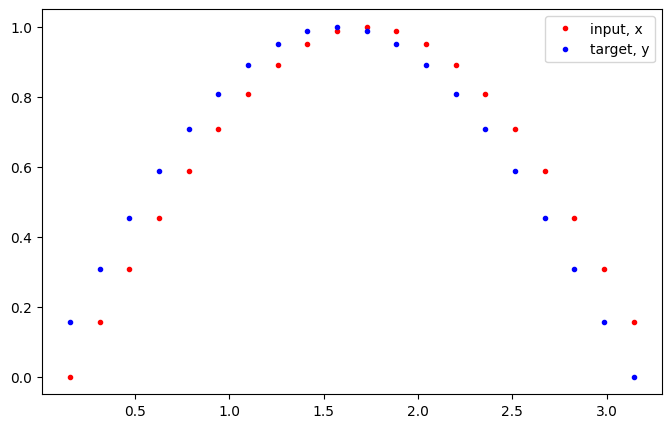

In [64]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 20

# generate evenly spaced data pts
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# x와y의 timestep은 1개씩 차이가 난다. rnn 예측을 위한 데이터를 만들기 위함이다.
# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [124]:
step=10
time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # input_size=1

x = data[:-1]
y = data[1:]

# convert data into Tensors
x_tensor = torch.Tensor(x).unsqueeze(1)# unsqueeze gives a 1, batch_size dimension
x_tensor = x_tensor.reshape(4,5,1)
y_tensor = torch.Tensor(y)
print(x_tensor)
print(x_tensor.size())

tensor([[[-1.2246e-15],
         [ 1.5643e-01],
         [ 3.0902e-01],
         [ 4.5399e-01],
         [ 5.8779e-01]],

        [[ 7.0711e-01],
         [ 8.0902e-01],
         [ 8.9101e-01],
         [ 9.5106e-01],
         [ 9.8769e-01]],

        [[ 1.0000e+00],
         [ 9.8769e-01],
         [ 9.5106e-01],
         [ 8.9101e-01],
         [ 8.0902e-01]],

        [[ 7.0711e-01],
         [ 5.8779e-01],
         [ 4.5399e-01],
         [ 3.0902e-01],
         [ 1.5643e-01]]])
torch.Size([4, 5, 1])


In [125]:
# train the RNN
def train(rnn, n_steps, print_every):




    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:] #정답값

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(1) # unsqueeze gives a 1, batch_size dimension
        x_tensor = x_tensor.reshape(4,5,1)
        y_tensor = torch.Tensor(y)


        # outputs from the rnn
        prediction,hidden = rnn(x_tensor)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        #hidden = hidden.detach()

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()


        # perform backprop and update weights
        loss.backward()
        #이전 배치에 업데이트된 가중치를 그대로 가지고 간다.(retain_graph=True로 할 경우)
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

    return rnn


## 모델학습

tensor([[[-9.4594e-03, -3.8531e-03, -3.3910e-02, -9.2036e-02,  6.3100e-02,
           1.0052e-01,  3.6060e-02, -2.2434e-02,  7.2179e-03,  8.9899e-02,
          -1.0131e-02, -9.9617e-02,  2.8817e-02, -2.2709e-02,  3.3149e-02,
          -2.3427e-02, -1.2435e-01,  1.5639e-01, -4.9237e-03,  2.8032e-02,
          -6.8982e-02,  7.7687e-02, -1.2774e-01,  4.3334e-02,  1.6392e-02,
           2.2525e-02,  1.1477e-01,  2.4086e-03,  6.8097e-02, -3.1383e-02,
          -1.1917e-01,  1.8000e-01],
         [-2.9313e-02, -7.0314e-02, -4.8832e-02, -5.6688e-02,  7.9494e-02,
           4.1777e-02, -1.1185e-02, -7.7875e-02,  5.7403e-02,  1.4271e-01,
           4.1612e-02, -1.0162e-01, -3.4172e-02, -2.3596e-02, -2.7153e-02,
          -2.8796e-02, -9.7554e-02,  1.8692e-01, -3.4454e-02, -2.3893e-02,
          -1.0191e-01,  3.6583e-02, -8.2026e-02, -5.0108e-03,  3.0969e-02,
           1.9171e-02,  1.7618e-01,  6.1160e-02,  6.7867e-02, -7.5654e-03,
          -1.4975e-01,  1.9735e-01],
         [-4.8656e-02, -1.

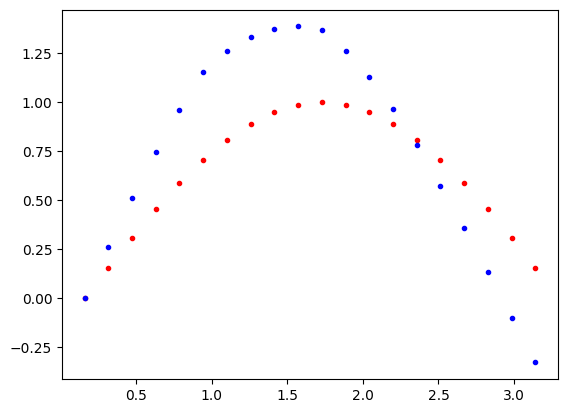

tensor([[[-9.0973e-03,  4.6030e-04, -2.7384e-02, -9.7803e-02,  6.3848e-02,
           1.0727e-01,  4.0440e-02, -1.8842e-02,  5.8317e-03,  8.4762e-02,
          -7.3928e-03, -9.8565e-02,  3.4232e-02, -2.5154e-02,  3.9125e-02,
          -3.4963e-02, -1.2437e-01,  1.5351e-01, -5.4433e-03,  3.2795e-02,
          -6.0659e-02,  8.2244e-02, -1.3065e-01,  4.4267e-02,  4.5065e-03,
           2.9828e-02,  1.1150e-01,  6.5329e-05,  5.6482e-02, -2.3255e-02,
          -1.2011e-01,  1.7407e-01],
         [ 1.0877e-02,  6.6366e-02, -1.3213e-02, -1.3265e-01,  4.7387e-02,
           1.6444e-01,  8.6963e-02,  3.6180e-02, -4.3890e-02,  3.2336e-02,
          -5.8620e-02, -9.6882e-02,  9.6237e-02, -2.4784e-02,  9.8575e-02,
          -2.8822e-02, -1.5092e-01,  1.2278e-01,  2.3937e-02,  8.3773e-02,
          -2.8124e-02,  1.2252e-01, -1.7517e-01,  9.1892e-02, -9.2711e-03,
           3.2682e-02,  4.9859e-02, -5.8282e-02,  5.7656e-02, -4.6662e-02,
          -8.9379e-02,  1.5727e-01],
         [ 3.0350e-02,  1.

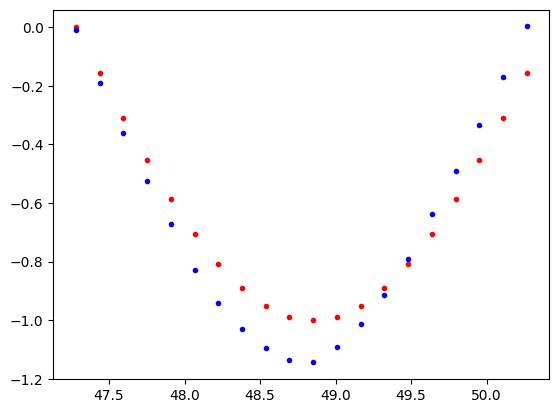

tensor([[[-0.0110, -0.0113,  0.0058, -0.0867,  0.0551,  0.1104,  0.0547,
          -0.0131,  0.0076,  0.0843, -0.0098, -0.0880,  0.0210,  0.0044,
           0.0410, -0.0450, -0.1190,  0.1443,  0.0007,  0.0267, -0.0607,
           0.0816, -0.1295,  0.0410, -0.0058,  0.0441,  0.1023,  0.0043,
           0.0252, -0.0785, -0.1184,  0.1407],
         [-0.0322, -0.0713,  0.0034, -0.0588,  0.0673,  0.0579,  0.0178,
          -0.0606,  0.0507,  0.1254,  0.0334, -0.0862, -0.0324,  0.0099,
          -0.0132, -0.0472, -0.0934,  0.1742, -0.0240, -0.0169, -0.0885,
           0.0507, -0.0911,  0.0024,  0.0038,  0.0438,  0.1570,  0.0563,
           0.0233, -0.0726, -0.1424,  0.1481],
         [-0.0528, -0.1294,  0.0011, -0.0315,  0.0792,  0.0065, -0.0182,
          -0.1066,  0.0927,  0.1649,  0.0755, -0.0844, -0.0843,  0.0152,
          -0.0660, -0.0493, -0.0683,  0.2031, -0.0480, -0.0593, -0.1155,
           0.0205, -0.0533, -0.0351,  0.0132,  0.0436,  0.2095,  0.1067,
           0.0214, -0.0668, -0

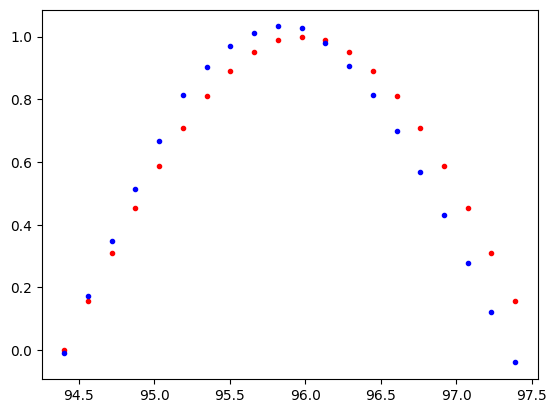

tensor([[[-1.0333e-02, -1.5932e-02,  1.9761e-02, -8.1549e-02,  5.1842e-02,
           1.0551e-01,  5.5646e-02, -1.1049e-02,  7.5597e-03,  8.6004e-02,
          -4.7626e-03, -8.7432e-02,  1.2616e-02, -6.0861e-03,  3.8420e-02,
          -4.9655e-02, -1.1522e-01,  1.4287e-01,  3.9717e-03,  2.0837e-02,
          -5.6090e-02,  7.2326e-02, -1.2339e-01,  3.7401e-02, -1.5529e-02,
           4.9044e-02,  1.0299e-01,  5.3789e-03,  2.1372e-02, -5.2390e-02,
          -1.1121e-01,  1.2825e-01],
         [ 9.1054e-03,  4.6724e-02,  2.3817e-02, -1.0749e-01,  4.0602e-02,
           1.5936e-01,  9.0203e-02,  3.7361e-02, -3.7109e-02,  4.2715e-02,
          -4.7570e-02, -8.8182e-02,  6.6292e-02, -1.0460e-02,  9.3471e-02,
          -4.8297e-02, -1.4000e-01,  1.1323e-01,  2.8023e-02,  6.5725e-02,
          -2.7428e-02,  1.0194e-01, -1.6338e-01,  7.6706e-02, -2.6529e-02,
           4.9282e-02,  4.6645e-02, -4.7584e-02,  2.2389e-02, -4.5371e-02,
          -8.7260e-02,  1.1967e-01],
         [ 2.8059e-02,  1.

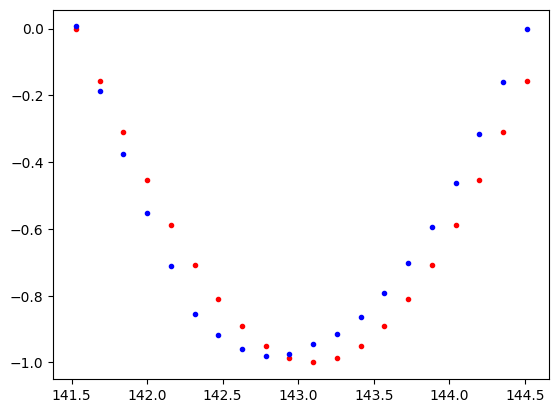

tensor([[[-1.0889e-02, -1.8322e-02,  2.1837e-02, -7.5088e-02,  4.9373e-02,
           1.0248e-01,  5.3917e-02, -1.2235e-02,  9.4776e-03,  8.8231e-02,
          -3.1505e-03, -8.4988e-02,  9.5208e-03, -6.2210e-04,  3.5600e-02,
          -4.8350e-02, -1.1504e-01,  1.4318e-01,  5.4383e-03,  1.8853e-02,
          -5.8161e-02,  6.8973e-02, -1.2113e-01,  3.5484e-02, -1.2932e-02,
           4.9578e-02,  1.0105e-01,  8.3309e-03,  1.9368e-02, -5.5538e-02,
          -1.1039e-01,  1.2222e-01],
         [-2.9003e-02, -8.2930e-02,  1.6151e-02, -4.9741e-02,  6.0476e-02,
           4.6526e-02,  1.9548e-02, -6.1744e-02,  5.5463e-02,  1.3310e-01,
           3.9933e-02, -8.5108e-02, -4.5241e-02,  2.9393e-03, -2.0680e-02,
          -4.9754e-02, -9.0363e-02,  1.7204e-01, -1.8791e-02, -2.7550e-02,
          -8.7819e-02,  3.8711e-02, -7.8981e-02, -5.2169e-03, -1.3024e-03,
           4.9223e-02,  1.5765e-01,  6.2331e-02,  1.8730e-02, -7.0639e-02,
          -1.3474e-01,  1.3236e-01],
         [-4.6653e-02, -1.

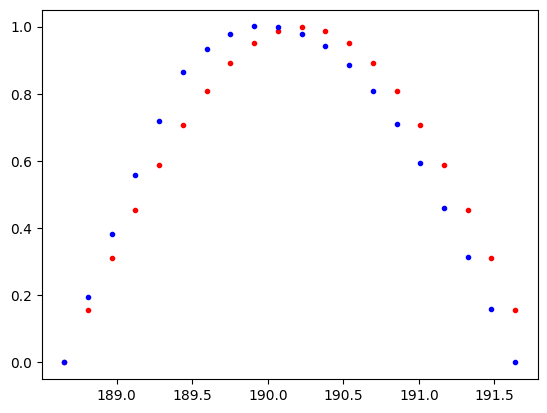

tensor([[[-1.1147e-02, -1.9297e-02,  2.6122e-02, -7.5132e-02,  4.7183e-02,
           1.0222e-01,  5.4458e-02, -1.0798e-02,  8.7976e-03,  8.7721e-02,
          -2.9057e-03, -8.4687e-02,  9.4624e-03, -1.5564e-03,  3.6674e-02,
          -4.3982e-02, -1.1571e-01,  1.4319e-01,  6.6342e-03,  1.8907e-02,
          -5.7797e-02,  6.7160e-02, -1.2110e-01,  3.5321e-02, -1.1308e-02,
           4.6209e-02,  9.9730e-02,  7.6990e-03,  2.1717e-02, -6.1382e-02,
          -1.0884e-01,  1.1981e-01],
         [ 7.0087e-03,  4.5496e-02,  3.1823e-02, -1.0040e-01,  3.6170e-02,
           1.5753e-01,  8.8317e-02,  3.8700e-02, -3.7259e-02,  4.2563e-02,
          -4.5826e-02, -8.4583e-02,  6.4159e-02, -5.0324e-03,  9.2754e-02,
          -4.2382e-02, -1.4023e-01,  1.1407e-01,  3.0713e-02,  6.5207e-02,
          -2.8301e-02,  9.6665e-02, -1.6279e-01,  7.5904e-02, -2.2639e-02,
           4.6338e-02,  4.2445e-02, -4.6346e-02,  2.2748e-02, -4.7509e-02,
          -8.4455e-02,  1.0987e-01],
         [ 2.4713e-02,  1.

In [126]:
# train the rnn and monitor results
n_steps = 75
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)